In [96]:
import os
import pandas as pd

txt_directory = "/Users/macbookpro/Desktop/Scraping/PERU-SL-txt"
output_file_path = "/Users/macbookpro/Desktop/Scraping/SL-gender.txt"


keywords = ['mujer', 'femenin']


dfs = []

with open(output_file_path, 'w', encoding='utf-8') as output_file:
    for filename in os.listdir(txt_directory):
        if filename.endswith(".txt"):
            txt_file_path = os.path.join(txt_directory, filename)

            with open(txt_file_path, 'r', encoding='utf-8') as file:
                content = file.read()

       
                total_occurrences = sum(content.lower().count(keyword) for keyword in keywords)

        
                document_title = os.path.splitext(filename)[0]
                df = pd.DataFrame({'File Name': [document_title], 'Female Word Occurences': [total_occurrences]})
                dfs.append(df)


shining_female_df = pd.concat(dfs, ignore_index=True)
print(shining_female_df)



    File Name  Female Word Occurences
0        3888                       0
1        3693                       0
2        7608                       0
3         712                       0
4        3526                       0
..        ...                     ...
249       723                       0
250      7836                       0
251      7822                       0
252      5760                       2
253      8278                       1

[254 rows x 2 columns]


In [97]:
total_female_occurrences = shining_female_df['Female Word Occurences'].sum()
print("Total mujer Occurrences:", total_female_occurrences)


Total mujer Occurrences: 928


In [15]:
import os
import re

txt_directory = "/Users/macbookpro/Desktop/Scraping/FMLN-txt"

total_word_count = 0
num_documents = 0
total_document_size = 0

for filename in os.listdir(txt_directory):
    if filename.endswith(".txt"):
        num_documents += 1  
        txt_file_path = os.path.join(txt_directory, filename)

        with open(txt_file_path, 'r', encoding='utf-8') as file:
            content = file.read()

            word_count = len(re.findall(r'\b\w+\b', content))
            total_word_count += word_count

            document_size = os.path.getsize(txt_file_path)
            total_document_size += document_size

#document statistics
print("Total Word Count:", total_word_count)
print("number of documents:", num_documents)
print("Average Word Count per Document:", "{:.2f}".format(total_word_count / num_documents))


Total Word Count: 162297
number of documents: 157
Average Word Count per Document: 1033.74


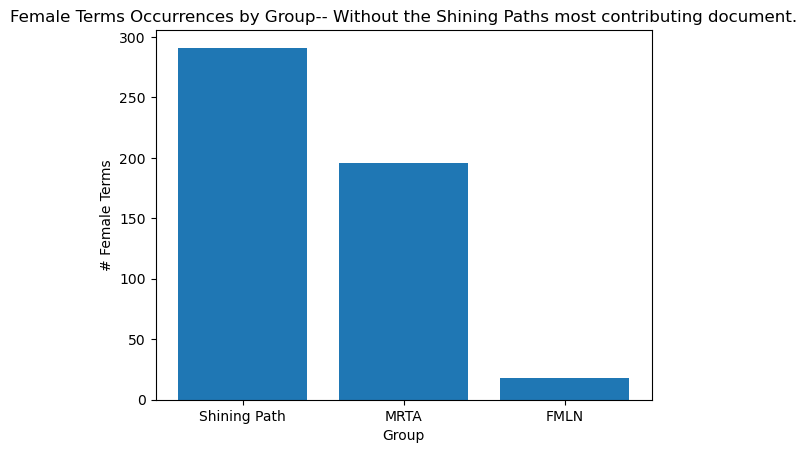

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Group': ['Shining Path', 'MRTA', 'FMLN'],
    '# Female Terms': [291, 196, 18]
}

df = pd.DataFrame(data)

plt.bar(df['Group'], df['# Female Terms'])
plt.xlabel('Group')
plt.ylabel('# Female Terms')
plt.title('Female Terms Occurrences by Group-- Without the Shining Paths most contributing document.')
plt.show()


In [56]:
import pandas as pd
import matplotlib.pyplot as plt

shiningPathdf = pd.read_csv('Desktop/Scraping/ShiningPathOutput.csv')
print(shiningPathdf)

FMLNdf = pd.read_csv('Desktop/Scraping/FMNLOutput.csv')
print(FMLNdf)

MRTAdf = pd.read_csv('Desktop/Scraping/MRTAOutput.csv')
print(MRTAdf)
print(shining_female_df)

     File Name        Date
0          710  1992-03-01
1          655  1988-07-01
2         5361  2016-12-31
3          747  2001-09-01
4         8115  2003-10-07
..         ...         ...
249        729  1995-03-01
250       8478  2019-12-31
251       9156  2022-02-01
252       5460  1992-01-01
253        857  2005-08-28

[254 rows x 2 columns]
     File Name        Date
0         4177  1989-11-15
1         9315  1986-07-01
2         8504  1990-01-01
3         9250  1984-05-01
4         3574  1980-11-03
..         ...         ...
153       5948  1992-12-15
154       8229  1981-01-30
155       2624  1984-11-30
156       8815  1983-12-16
157       8680  1985-07-25

[158 rows x 2 columns]
     File Name        Date
0         4931  2012-04-22
1         5224  2012-10-08
2         3523  1997-10-01
3         8816  1999-12-17
4         3165  2009-03-29
..         ...         ...
179       6889  1998-10-01
180       3222  2009-04-22
181       7518  2000-02-01
182       3760  1985-02-01
183    

In [86]:
import pandas as pd
shiningPathdf['File Name'] = shiningPathdf['File Name'].astype(str)
shining_female_df['File Name'] = shining_female_df['File Name'].astype(str)
merged_df = pd.merge(shiningPathdf, shining_female_df, on='File Name', how='inner')


print(merged_df)

    File Name        Date  Female Word Occurences
0         710  1992-03-01                       0
1         655  1988-07-01                       1
2        5361  2016-12-31                       0
3         747  2001-09-01                       0
4        8115  2003-10-07                       0
..        ...         ...                     ...
249       729  1995-03-01                       0
250      8478  2019-12-31                       0
251      9156  2022-02-01                       0
252      5460  1992-01-01                       0
253       857  2005-08-28                       0

[254 rows x 3 columns]


In [89]:
zero_count = (merged_df['Female Word Occurences'] == 0).sum()

print(f"Number of zero values in column '{'Female Word Occurences'}': {zero_count}")

Number of zero values in column 'Female Word Occurences': 200


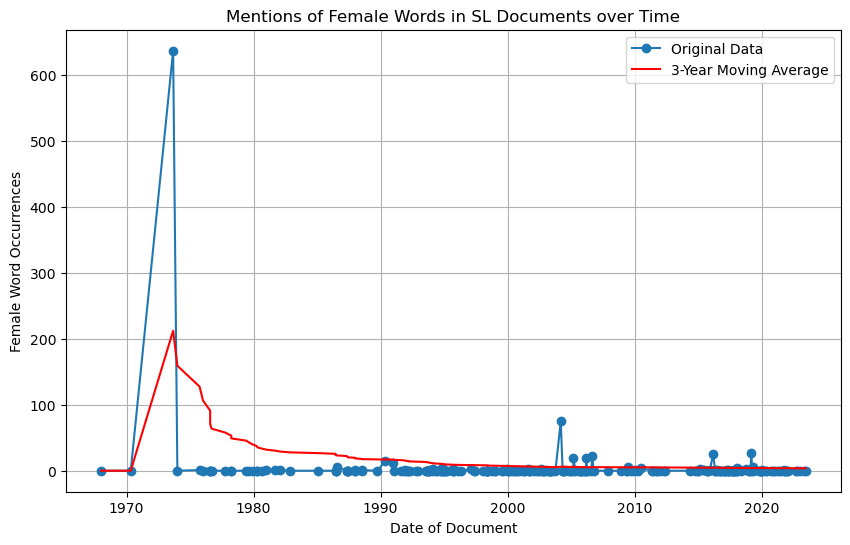

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df['Date'] = pd.to_datetime(merged_df['Date'])

merged_df = merged_df.sort_values(by='Date')

#3-year moving average
merged_df['3-Year MA'] = merged_df['Female Word Occurences'].rolling(window=3*365, min_periods=1).mean()

plt.figure(figsize=(10, 6))
#orig
plt.plot(merged_df['Date'], merged_df['Female Word Occurences'], label='Original Data', marker='o')

#3 year ]
plt.plot(merged_df['Date'], merged_df['3-Year MA'], label='3-Year Moving Average', color='red')

plt.title('Mentions of Female Words in SL Documents over Time')
plt.xlabel('Date of Document')
plt.ylabel('Female Word Occurrences')
plt.grid(True)
plt.legend()
plt.show()

In [80]:
merged_df

,File Name,Date,Female Word Occurences,3-Year MA
186,627,1968-01-01,0,0.000000
130,630,1970-05-01,0,0.000000
115,633,1973-09-01,637,212.333333
180,631,1974-01-01,0,159.250000
20,634,1975-10-01,1,127.600000
...,...,...,...,...
170,9384,2022-09-01,0,3.712000
187,9388,2022-10-01,0,3.697211
134,9472,2022-12-26,0,3.682540
197,9593,2023-05-01,0,3.667984


In [81]:
merged_sorted = merged_df.sort_values(by='Female Word Occurences', ascending=True)
merged_sorted = merged_sorted.drop(115)
print(merged_sorted)

    File Name       Date  Female Word Occurences  3-Year MA
186       627 1968-01-01                       0   0.000000
43        863 2006-01-01                       0   5.378378
151      1263 2006-02-24                       0   5.342282
18       1396 2006-04-01                       0   5.397351
157      1371 2006-04-01                       0   5.361842
..        ...        ...                     ...        ...
92        852 2005-03-08                      19   5.719424
247      6333 2006-09-01                      22   5.435065
63       7086 2016-03-08                      25   4.766304
224      8233 2019-03-08                      27   4.112108
8         839 2004-03-08                      75   6.007752

[253 rows x 4 columns]


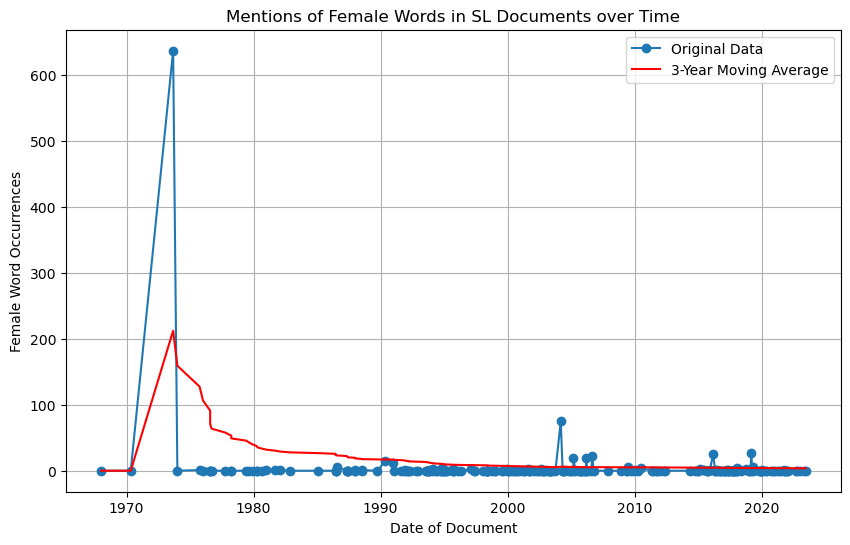

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df['Date'] = pd.to_datetime(merged_df['Date'])

merged_df = merged_df.sort_values(by='Date')

merged_df['3-Year MA'] = merged_df['Female Word Occurences'].rolling(window=3*365, min_periods=1).mean()

plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['Female Word Occurences'], label='Original Data', marker='o')
plt.plot(merged_df['Date'], merged_df['3-Year MA'], label='3-Year Moving Average', color='red')
plt.title('Mentions of Female Words in SL Documents over Time')
plt.xlabel('Date of Document')
plt.ylabel('Female Word Occurrences')
plt.grid(True)
plt.legend()
plt.show()